<img src='https://www.actris.eu/sites/default/files/inline-images/Actris%20logo.png' width=200 align=right>

# ACTRIS DC 
## Access ACTRIS In-Situ data

In [12]:
# import packages
import pandas as pd
import numpy as np 
import requests
import json
import xarray as xr

import matplotlib.pyplot as plt

## Get all In-Situ metadata

After searching in the Metadata REST API, one chooses the metadata from certain parameters. 

In this example we get metadata from all ACTRIS In-Situ Data Centre unit data. Which is provider 14 IN-SITU

In [13]:
response = requests.get('https://prod-actris-md.nilu.no/Providers/14')
provider_14 = response.json()
provider_14 

[{'id': 14,
  'name': 'IN-SITU',
  'acronym': 'IN-SITU',
  'description': 'ACTRIS In situ data centre unit (In-Situ)',
  'created': '2020-06-29T07:20:45.2311600Z'}]

In [14]:
response = requests.get("https://prod-actris-md.nilu.no/Metadata/provider/14") 
metadata_archive = response.json() 
print("The in-situ metadata archive contains {} datasets".format(len(metadata_archive)))

The in-situ metadata archive contains 20102 datasets


In [15]:
# View one metadata record form the In-Situ metadata archive

metadata_archive[0]

{'md_metadata': {'id': 203110,
  'provider': {'name': 'IN-SITU',
   'atom': 'http://localhost:5009/providers/14'},
  'file_identifier': 'RTXS-U8P8.nc',
  'language': 'en',
  'hierarchy_level': 'dataset',
  'online_resource': {'linkage': 'http://ebas.nilu.no/'},
  'datestamp': '2024-06-13T22:00:00.0000000Z',
  'created': '2024-06-14T08:00:07.0000000Z',
  'contact': [{'first_name': 'Markus',
    'last_name': 'Fiebig',
    'organisation_name': 'NILU',
    'role_code': ['custodian'],
    'country_code': 'NO',
    'delivery_point': 'Instituttveien 18',
    'address_city': 'Kjeller',
    'administrative_area': 'Viken',
    'postal_code': 2007,
    'email': 'ebas@nilu.no',
    'position_name': 'Senior Scientist'}]},
 'md_identification': {'abstract': 'Ozone at Arkona. These measurements are gathered as a part of the following projects EMEP',
  'title': 'Ozone at Arkona',
  'date_type': 'creation',
  'contact': [{'first_name': 'Yong',
    'last_name': 'Lin',
    'organisation_name': 'NILU',
  

In [16]:
# Extract the metadata records for datasets with attributes: aerosol particle light absorption coefficient
abs_list = []
for md in metadata_archive: 
    if md['md_content_information']['attribute_descriptions'][0] == 'aerosol particle light absorption coefficient': 
        abs_list.append(md)

Each dataset in the in-situ catalogue have the option to download or stream the file itself. 

The two protocols used are: 

**HTTP** which is direct download and gives you a phycical netCDF file on your computer. 

**OPeNDAP** which is streaming of data in binary form, no download needed. 

In [17]:
# Example to show the distribution information for the first dataset in the list
abs_list[0]['md_distribution_information']

[{'data_format': 'NETCDF',
  'version_data_format': '4',
  'dataset_url': 'https://thredds.nilu.no/thredds/dodsC/ebas_doi/VC/RD/73/VCRD-73GB.nc',
  'protocol': 'OPeNDAP',
  'function': 'streaming',
  'restriction': {'set': False},
  'transfersize': 2905986.0},
 {'data_format': 'NETCDF',
  'version_data_format': '4',
  'dataset_url': 'https://thredds.nilu.no/thredds/fileServer/ebas_doi/VC/RD/73/VCRD-73GB.nc',
  'protocol': 'HTTP',
  'function': 'download',
  'restriction': {'set': False},
  'transfersize': 2905986.0}]

In this example we will use the OPeNDAP protocol

In [11]:
files_list = []
for md in abs_list:
    for i in range(len(md['md_distribution_information'])):
        if md['md_distribution_information'][i]['protocol'] == 'OPeNDAP':
            url = md['md_distribution_information'][i]['dataset_url']
            files_list.append(url)

### Inspecting the dataset

In [36]:
opendap_url = files_list[-10] # Select any file you want from the files_list. 

In [37]:
ds = xr.open_dataset(opendap_url)
ds

<xarray.Dataset>
Dimensions:                                               (time: 8760,
                                                           tbnds: 2,
                                                           metadata_time: 1,
                                                           Wavelength: 7,
                                                           aerosol_absorption_coefficient_amean_qc_flags: 1,
                                                           aerosol_absorption_coefficient_prec1587_qc_flags: 1,
                                                           aerosol_absorption_coefficient_perc8413_qc_flags: 1)
Coordinates:
  * time                                                  (time) datetime64[ns] ...
  * metadata_time                                         (metadata_time) datetime64[ns] ...
  * Wavelength                                            (Wavelength) float64 ...
Dimensions without coordinates: tbnds,
                                aerosol_absorption_coefficient_amean_qc_flags,
                                aerosol_absorption_coefficient_prec1587_qc_flags,
                                aerosol_absorption_coefficient_perc8413_qc_flags
Data variables:
    time_bnds                                             (time, tbnds) datetime64[ns] ...
    metadata_time_bnds                                    (metadata_time, tbnds) datetime64[ns] ...
    aerosol_absorption_coefficient_amean_qc               (Wavelength, aerosol_absorption_coefficient_amean_qc_flags, time) float64 ...
    aerosol_absorption_coefficient_amean_ebasmetadata     (Wavelength, metadata_time) |S64 ...
    aerosol_absorption_coefficient_prec1587_qc            (Wavelength, aerosol_absorption_coefficient_prec1587_qc_flags, time) float64 ...
    aerosol_absorption_coefficient_prec1587_ebasmetadata  (Wavelength, metadata_time) |S64 ...
    aerosol_absorption_coefficient_perc8413_qc            (Wavelength, aerosol_absorption_coefficient_perc8413_qc_flags, time) float64 ...
    aerosol_absorption_coefficient_perc8413_ebasmetadata  (Wavelength, metadata_time) |S64 ...
    aerosol_absorption_coefficient_amean                  (Wavelength, time) float64 ...
    aerosol_absorption_coefficient_prec1587               (Wavelength, time) float64 ...
    aerosol_absorption_coefficient_perc8413               (Wavelength, time) float64 ...
Attributes: (12/107)
    Conventions:                     CF-1.8, ACDD-1.3
    featureType:                     timeSeries
    title:                           Aerosol_absorption_coefficient at Barcel...
    keywords:                        ES0019U, Barcelona (Palau Reial), ACTRIS...
    id:                              4BC8-EHRE.nc
    naming_authority:                EBAS
    ...                              ...
    geospatial_lat_units:            degrees_north
    geospatial_lon_units:            degrees_east
    comment:                         {\n    "Data definition": "EBAS_1.1",\n ...
    standard_name_vocabulary:        CF-1.7, ACDD-1.3
    history:                         None
    creator_url:                     ebas.nilu.no

## Plot data with xarray/matplotlib

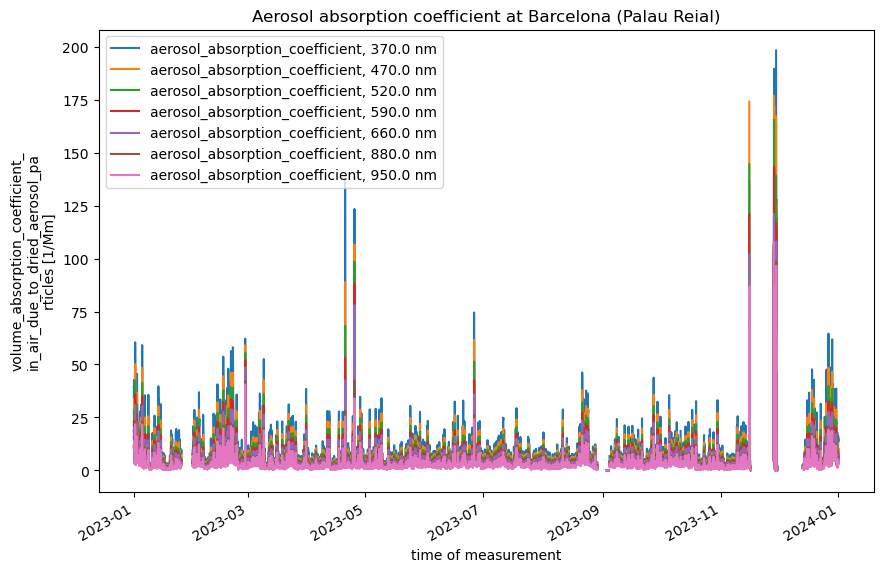

In [38]:
# This code runs if dataset above is dataset from filter absorption photometer instruments. 

ds_filter = ds.aerosol_absorption_coefficient_amean 

fig, ax = plt.subplots(figsize=(10,6))

for i in range(len(ds_filter.Wavelength.values)): 
    ds_filter.isel(Wavelength=i).plot(ax=ax, label="aerosol_absorption_coefficient, {} nm".format(ds_filter.Wavelength.values[i]))

plt.title("{} at {}".format(ds_filter.ebas_component.replace('_',' ').capitalize(), ds.ebas_station_name))
    
plt.legend()
plt.show()